# UUZOP Projekt - 1. dio

<b>Naziv članka</b>: Birth prediction of new born baby with application of machine learning techniques on features of mother





In [59]:
import numpy as np
import pandas as pd

# za nedostajuće vrijednosti
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# vizualizacija
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

## Učitavanje podataka

In [3]:
df = pd.read_csv("CBWDB.csv")

## Pregled i upoznavanje s podatacima

In [4]:
# broj zapisa i značajki
df.shape

(1800, 19)

In [6]:
# prikaz prvih pet vrijednosti
df.head()

,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
0,BPL,23.0,146.0,A(+ve),1.0,4.0,34.0,42.0,116.0,78.0,120.0,70.0,10.0,13.2,90.0,T,F,2.7,2.0
1,BPL,25.0,165.0,NIL,1.0,3.0,68.0,71.0,96.0,70.0,110.0,72.0,10.4,11.0,96.0,T,M,2.9,2.0
2,BPL,24.0,155.0,B(+ve),1.0,3.0,49.0,55.0,91.0,52.0,110.0,70.0,11.0,11.6,102.0,T,M,2.4,1.0
3,BPL,19.0,154.0,NIL,1.0,2.0,49.0,50.0,90.0,52.0,100.0,60.0,10.0,10.6,103.0,T,F,2.6,2.0
4,BPL,21.0,150.0,NIL,1.0,4.0,41.0,48.0,100.0,60.0,110.0,70.0,9.0,10.2,99.0,T,F,2.3,1.0


#### Pojašnjenja značajki

<ul>
    <li> <b>SEC</b> - Socio-Economic Condition</li>
    <ul>
        <li><b>BPL</b> - Below poverty line</li>
        <li><b>APL</b> - Above poverty line</li>
    </ul>
    <li><b>Age(years)</b> - Age of mother at the time of pregnancy</li>
    <li><b>Height(cm)</b> - Height of mother at the time of pregnancy</li>
    <li><b>Bgroup</b> - Blood Group of mother</li>
    <li><b>Parity</b> - No. of previous pregnancy crossing the period of viability</li>
    <li><b>ANC</b> - Antenatal Check</li>
    <li><b>Iwt(kg)</b> - Initial weight of mother</li>
    <li><b>FWt(kg)</b> - Final weight of mother (last ANC)</li>
    <li><b>IBP_sys</b> - Initial systolic Blood Pressure</li>
    <li><b>IBP_dias</b> - Initial diastolic Blood Pressure</li>
    <li><b>FBP_sys</b> - Final systolic Blood Pressure (last ANC)</li>
    <li><b>FBP_dias</b> - Final diastolic Blood Pressure (last ANC)</li>
    <li><b>IHb(gm%)</b> - Initial Haemoglobin level</li>
    <li><b>FHb(gm%)</b> - Final Haemoglobin level (last ANC)</li>
    <li><b>BS(RBS)</b> - Blood Sugar (Random)</li>
    <li><b>Term/Preterm</b> - <i>Term</i>: 37 to 40 weeks, <i>Preterm</i>: $\lt$37 weeks </li>
    <li><b>Sex</b> - Sex of new born baby
    <li><b>BWt(kg)</b> - Baby birth weight</li>
    <li><b>LNH</b> - Class level name</li>
    <ul>
        <li><b>L=1</b> - Low-weight</li>
        <li><b>N=2</b> - Normal-weight</li>
        <li><b>H=3</b> - Over-weight</li>
    </ul>
</ul>



In [7]:
df.describe()

,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),BWt(kg),LNH
count,1786.000000,1527.000000,1767.000000,1781.000000,1751.000000,1739.000000,1760.000000,1760.000000,1749.000000,1748.000000,1395.000000,1393.000000,608.000000,1072.000000,1072.000000
mean,22.986002,143.785855,0.667233,3.423358,45.749857,51.645371,108.032386,66.091477,111.819325,69.405606,9.919398,10.401651,100.898026,2.759580,1.871269
std,4.050843,19.702879,0.993277,0.889005,6.655457,6.905943,12.021658,8.263232,11.809435,9.249682,1.052058,0.989487,17.251874,0.430413,0.346026
min,8.000000,10.000000,0.000000,1.000000,30.000000,30.000000,10.000000,14.000000,10.000000,10.000000,6.000000,1.500000,12.000000,0.500000,1.000000
25%,20.000000,135.000000,0.000000,3.000000,41.000000,47.000000,100.000000,60.000000,110.000000,60.000000,9.200000,10.000000,93.000000,2.500000,2.000000
50%,22.000000,150.000000,0.000000,4.000000,45.000000,51.000000,110.000000,66.000000,110.000000,70.000000,10.000000,10.400000,100.000000,2.700000,2.000000
75%,25.000000,150.000000,1.000000,4.000000,50.000000,55.000000,112.000000,70.000000,120.000000,78.000000,10.600000,11.000000,109.000000,3.000000,2.000000
max,55.000000,195.000000,6.000000,4.000000,93.000000,100.000000,196.000000,100.000000,160.000000,117.000000,13.000000,13.200000,240.000000,4.500000,3.000000


### Nedostajući podaci


In [93]:
print(df.shape)
df.isna().sum()

(1800, 19)


SEC              650
Age(years)        14
Height(cm)       273
Bgroup          1002
Parity            33
ANC               19
Iwt(kg)           49
FWt(kg)           61
IBP_sys           40
IBP_dias          40
FBP_sys           51
FBP_dias          52
IHb(gm%)         405
FHb(gm%)         407
BS(RBS)         1192
Term/Preterm     838
Sex              658
BWt(kg)          728
LNH              728
dtype: int64

Jedino što bismo mogli ukloniti su zapisi koji nemaju Age, što čini oko 8% podataka. <br>
Ostale podatke ne želimo ukloniti jer bi izgubili previše podataka.<br>
Koristit ćemo <code>IterativeInputer</code> za popunjavanje nedostajućih vrijednosti. 

In [19]:
# dohvati sve brojčane stupce
numeric_columns = df._get_numeric_data().columns.values.tolist()
print(numeric_columns)

# novi dataframe samo sa numeričkim vrijednostima
df_numeric = df[numeric_columns]
df_numeric.head()

['Age(years)', 'Height(cm)', 'Parity', 'ANC', 'Iwt(kg)', 'FWt(kg)', 'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias', 'IHb(gm%)', 'FHb(gm%)', 'BS(RBS)', 'BWt(kg)', 'LNH']


,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),BWt(kg),LNH
0,23.0,146.0,1.0,4.0,34.0,42.0,116.0,78.0,120.0,70.0,10.0,13.2,90.0,2.7,2.0
1,25.0,165.0,1.0,3.0,68.0,71.0,96.0,70.0,110.0,72.0,10.4,11.0,96.0,2.9,2.0
2,24.0,155.0,1.0,3.0,49.0,55.0,91.0,52.0,110.0,70.0,11.0,11.6,102.0,2.4,1.0
3,19.0,154.0,1.0,2.0,49.0,50.0,90.0,52.0,100.0,60.0,10.0,10.6,103.0,2.6,2.0
4,21.0,150.0,1.0,4.0,41.0,48.0,100.0,60.0,110.0,70.0,9.0,10.2,99.0,2.3,1.0


In [76]:
df_imputer_mice = df_numeric.copy(deep=True)
df_imputer_mice.isna().sum()


Age(years)    14
Height(cm)     0
Parity         0
ANC            0
Iwt(kg)        0
FWt(kg)        0
IBP_sys        0
IBP_dias       0
FBP_sys        0
FBP_dias       0
IHb(gm%)       0
FHb(gm%)       0
BS(RBS)        0
BWt(kg)        0
LNH            0
dtype: int64

In [44]:
iterativeimputer = IterativeImputer(random_state=42,verbose=2, max_iter=1000,min_value=0)
df_imputer_mice.iloc[:,1:]=iterativeimputer.fit_transform(df_imputer_mice.iloc[:,1:])

[IterativeImputer] Completing matrix with shape (1800, 14)
[IterativeImputer] Ending imputation round 1/1000, elapsed time 0.06
[IterativeImputer] Change: 0.0, scaled tolerance: 0.24 
[IterativeImputer] Early stopping criterion reached.


In [45]:
# popunjene nedostajuće vrijednosti
df_imputer_mice

,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),BWt(kg),LNH
0,23.0,146.000000,1.0,4.000000,34.000000,42.000000,116.000000,78.000000,120.000000,70.000000,10.000000,13.200000,90.000000,2.700000,2.000000
1,25.0,165.000000,1.0,3.000000,68.000000,71.000000,96.000000,70.000000,110.000000,72.000000,10.400000,11.000000,96.000000,2.900000,2.000000
2,24.0,155.000000,1.0,3.000000,49.000000,55.000000,91.000000,52.000000,110.000000,70.000000,11.000000,11.600000,102.000000,2.400000,1.000000
3,19.0,154.000000,1.0,2.000000,49.000000,50.000000,90.000000,52.000000,100.000000,60.000000,10.000000,10.600000,103.000000,2.600000,2.000000
4,21.0,150.000000,1.0,4.000000,41.000000,48.000000,100.000000,60.000000,110.000000,70.000000,9.000000,10.200000,99.000000,2.300000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,26.0,143.545310,0.0,3.000000,39.000000,40.000000,110.000000,78.000000,112.000000,80.000000,10.013954,10.189386,98.678020,2.538147,1.809886
1796,22.0,142.578604,0.0,3.476285,45.757218,51.696169,107.717087,66.213045,111.592645,69.684351,9.984951,10.453436,99.932508,2.752004,1.862407
1797,24.0,144.408805,1.0,3.397997,45.727589,51.545991,108.203325,66.018337,111.891502,69.191099,9.770436,10.241418,98.195361,2.718164,1.854147
1798,24.0,146.239006,2.0,3.319708,45.697959,51.395813,108.689564,65.823629,112.190359,68.697848,9.555922,10.029401,96.458214,2.684324,1.845887


### Stršeće vrijednosti
age - minimum 8 godina - postoje slučajevi<br>
height - minimum 10cm - nemoguće<br>
parity - velika odstupanja ali je moguće<br>
IBP_sys, IBP_dias, FBP_sys i FBP_dias - minimalna vrijednost jako niska, nemoguće?<br>
FHb - minimalna vrijednost niska. Moguće?<br>
BWt - minimalna vrijednost odstupa, ali je moguće<br>


In [33]:
# provjera stršećih vrijednosti visine
# TODO: promijeni u df_numeric?
print('Height < 100cm: ', (df['Height(cm)'] < 100).sum())
print('Height < 80cm: ', (df['Height(cm)'] < 80).sum())
print('Height < 50cm: ', (df['Height(cm)'] < 50).sum())
df.loc[df['Height(cm)'] < 50, 'Height(cm)']

df.loc[df['Height(cm)'] < 80]

Height < 100cm:  27
Height < 80cm:  3
Height < 50cm:  2


,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
106,APL,23.0,60.0,NIL,1.0,4.0,45.0,52.0,90.0,50.0,120.0,80.0,10.2,11.0,114.0,T,M,2.5,2.0
227,APL,19.0,48.0,B(+ve),0.0,4.0,42.0,47.0,100.0,70.0,100.0,60.0,12.1,12.1,102.0,T,M,3.3,2.0
703,BPL,20.0,10.0,NaN,4.0,4.0,42.0,49.0,110.0,60.0,120.0,70.0,9.5,10.6,NaN,T,M,2.5,2.0


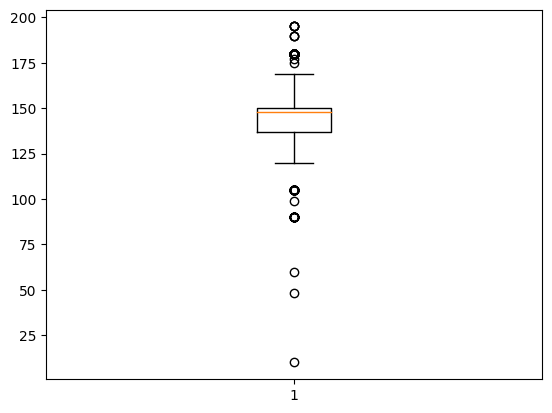

In [60]:
# box plot za otkrivanje stršećih vrijendosti visine
plt.boxplot(df_imputer_mice['Height(cm)'])
plt.show()

In [58]:
# provjera stršećih vrijednosti sistoličkog tlaka [IBP_sys]
print('IBP_sys < 100: ', (df_numeric['IBP_sys'] < 100).sum())
print('IBP_sys < 80: ', (df_numeric['IBP_sys'] < 80).sum())
print('IBP_sys < 50: ', (df_numeric['IBP_sys'] < 50).sum())

mean = df_numeric['IBP_sys'].mean()
print('MEAN of IBP_sys: ', mean)
df_numeric.loc[df_numeric['IBP_sys'] < 50, 'IBP_sys']


IBP_sys < 100:  187
IBP_sys < 80:  14
IBP_sys < 50:  8
MEAN of IBP_sys:  108.04291163540374


105    10.0
231    10.0
235    20.0
339    10.0
382    10.0
530    10.0
582    10.0
727    10.0
Name: IBP_sys, dtype: float64

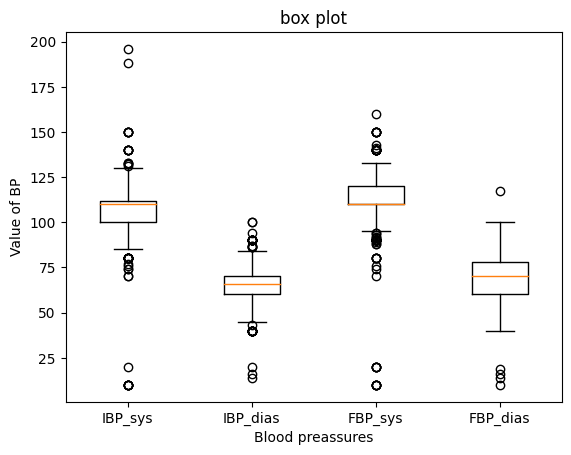

In [78]:
# podaci o svakoj skupini izmjerenih tlakova
data1 = df_numeric['IBP_sys']
data2 = df_numeric['IBP_dias']
data3 = df_numeric['FBP_sys']
data4 = df_numeric['FBP_dias']


fig, ax = plt.subplots()
data = list([data1,data2,data3,data4])

ax.boxplot(data)

# title and axis labels
ax.set_title('box plot')
ax.set_xlabel('Blood preassures')
ax.set_ylabel('Value of BP')
xticklabels=['IBP_sys', 'IBP_dias','FBP_sys' ,'FBP_dias' ]
ax.set_xticklabels(xticklabels)
plt.show()


## Vizualizacija

#### Prikaz udjela socio-ekonomskih kategorija

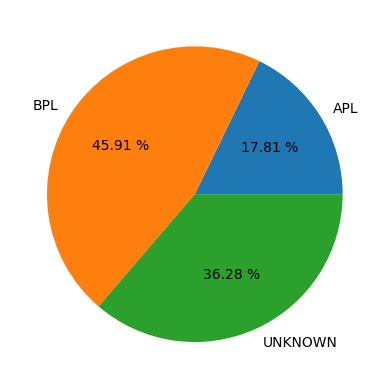

In [108]:
# postavi NaN vrijednosti u stupcu SEC na 'UNKNOWN'
# kasnije na neki način razrješiti taj problem, zasada ostavljamo ovako
df['SEC'] = df['SEC'].fillna('UNKNOWN')

count_per_category = df.groupby('SEC').count().loc[:,'Age(years)'].values
percent = (count_per_category/len(df))*100
title_name = df.groupby('SEC').count().index.values

plt.pie(count_per_category, labels=title_name, autopct='%.2f %%')
plt.show()

#### Histogram visine

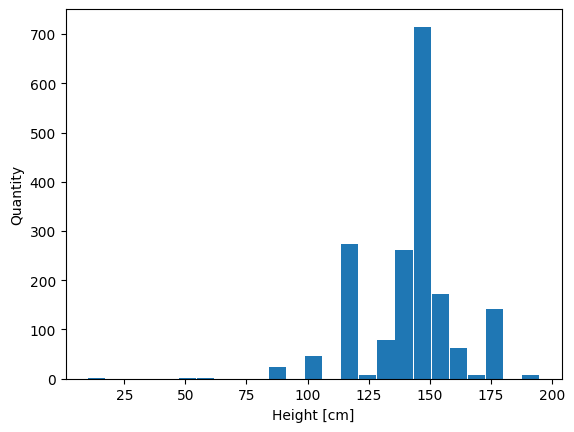

In [118]:
plt.hist(df_numeric['Height(cm)'], rwidth=0.95, bins=25)  
plt.ylabel('Quantity')
plt.xlabel('Height [cm]')
plt.show()

#### Graf raspršenja

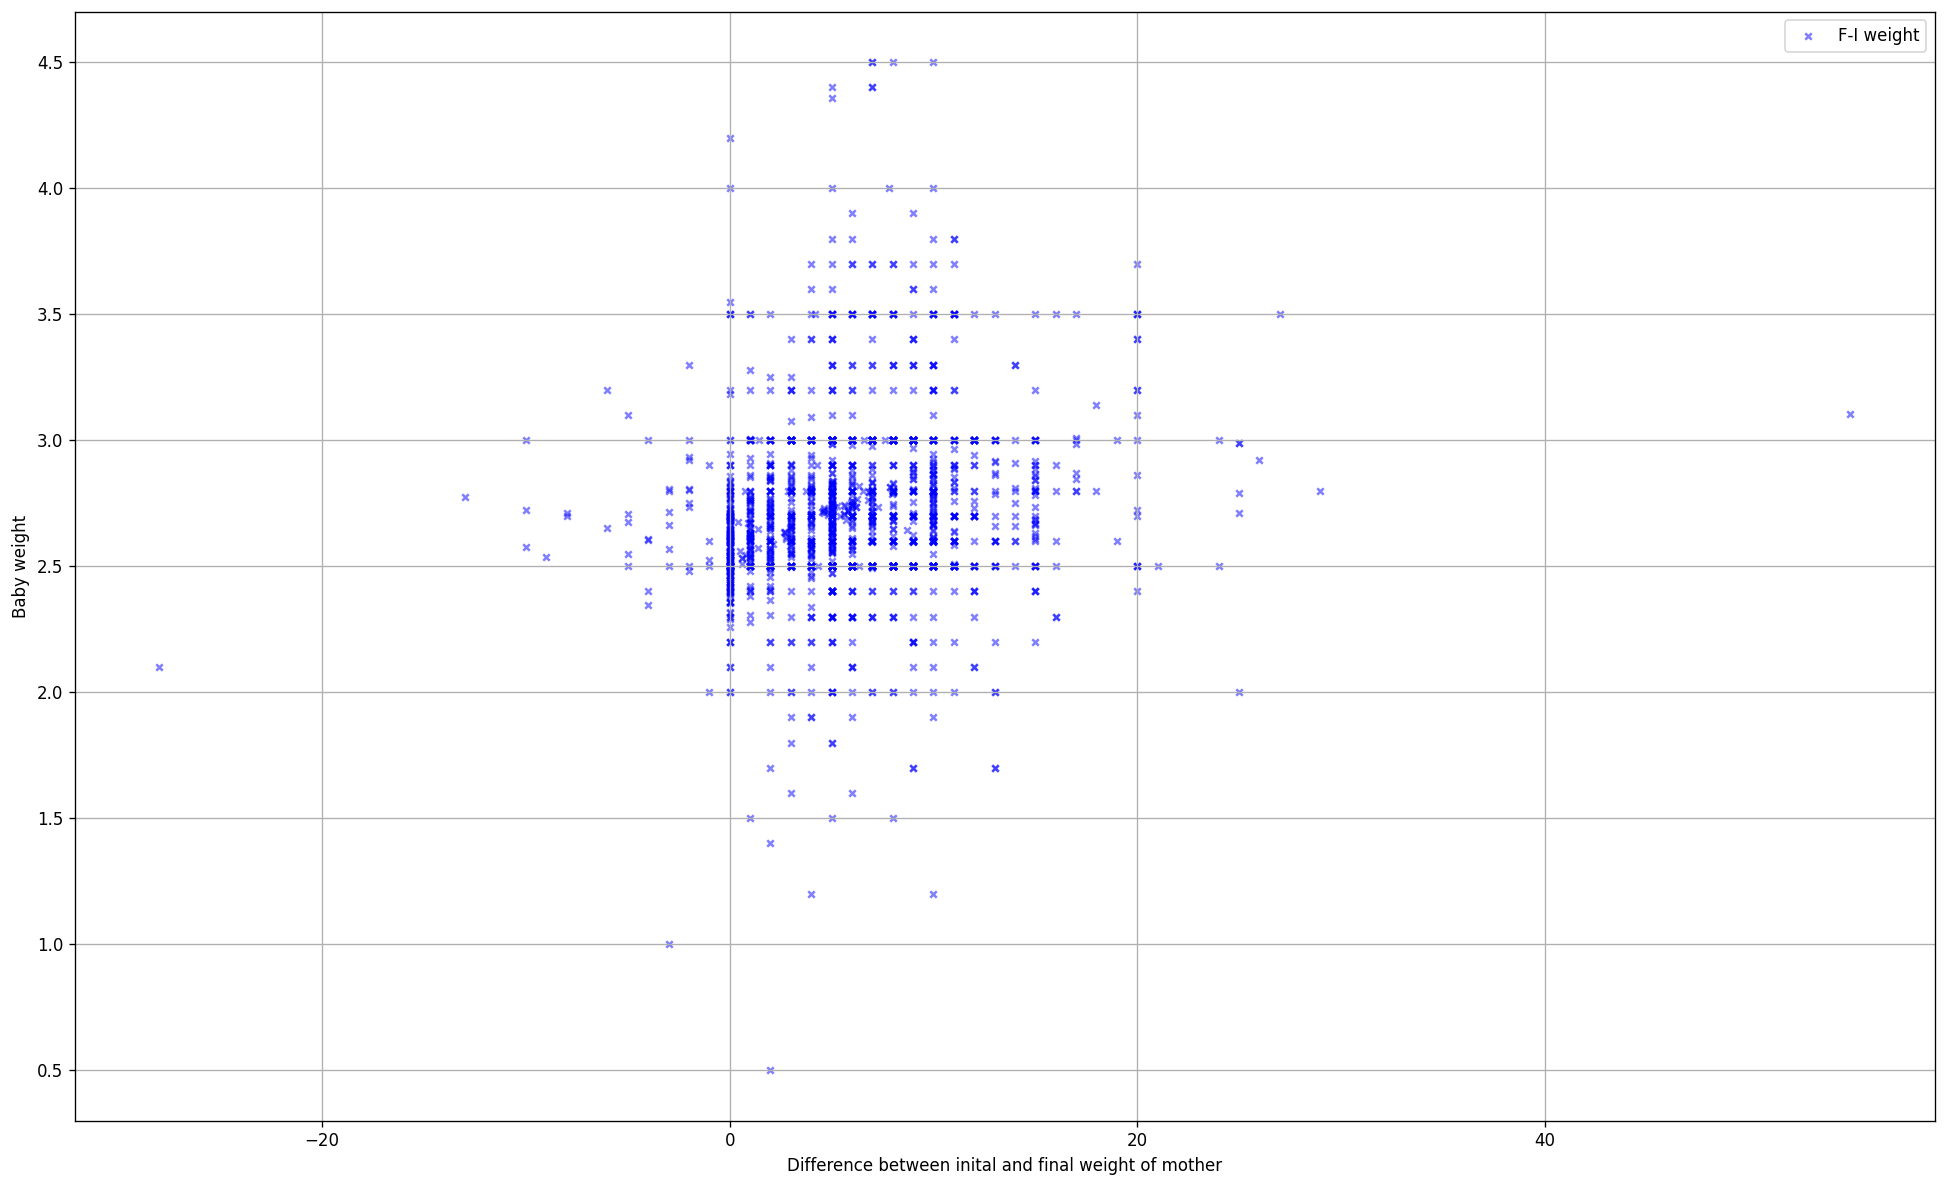

In [144]:
# graf raspršenja gdje uspoređujemo razliku težine majke pred kraj i na početku trudnoće s težinom bebe
plt.figure(figsize=(20, 12), dpi=120)

plt.scatter(df_numeric['FWt(kg)'] - df_numeric['Iwt(kg)'], df_numeric['BWt(kg)'], s=15, alpha=0.5,marker='x', c='b', label='F-I weight')
plt.xlabel('Difference between inital and final weight of mother')
plt.ylabel('Baby weight')
plt.grid()
plt.legend(loc='best')
plt.show()

Ovdje možemo uočiti da X-os ima i negativne vrijednosti, što je neobično jer to znači da je žena bila teža na početku trudnoće, nego pred kraj. <br>
Moguće da je to zbog generiranih nedostajućih vrijednosti.

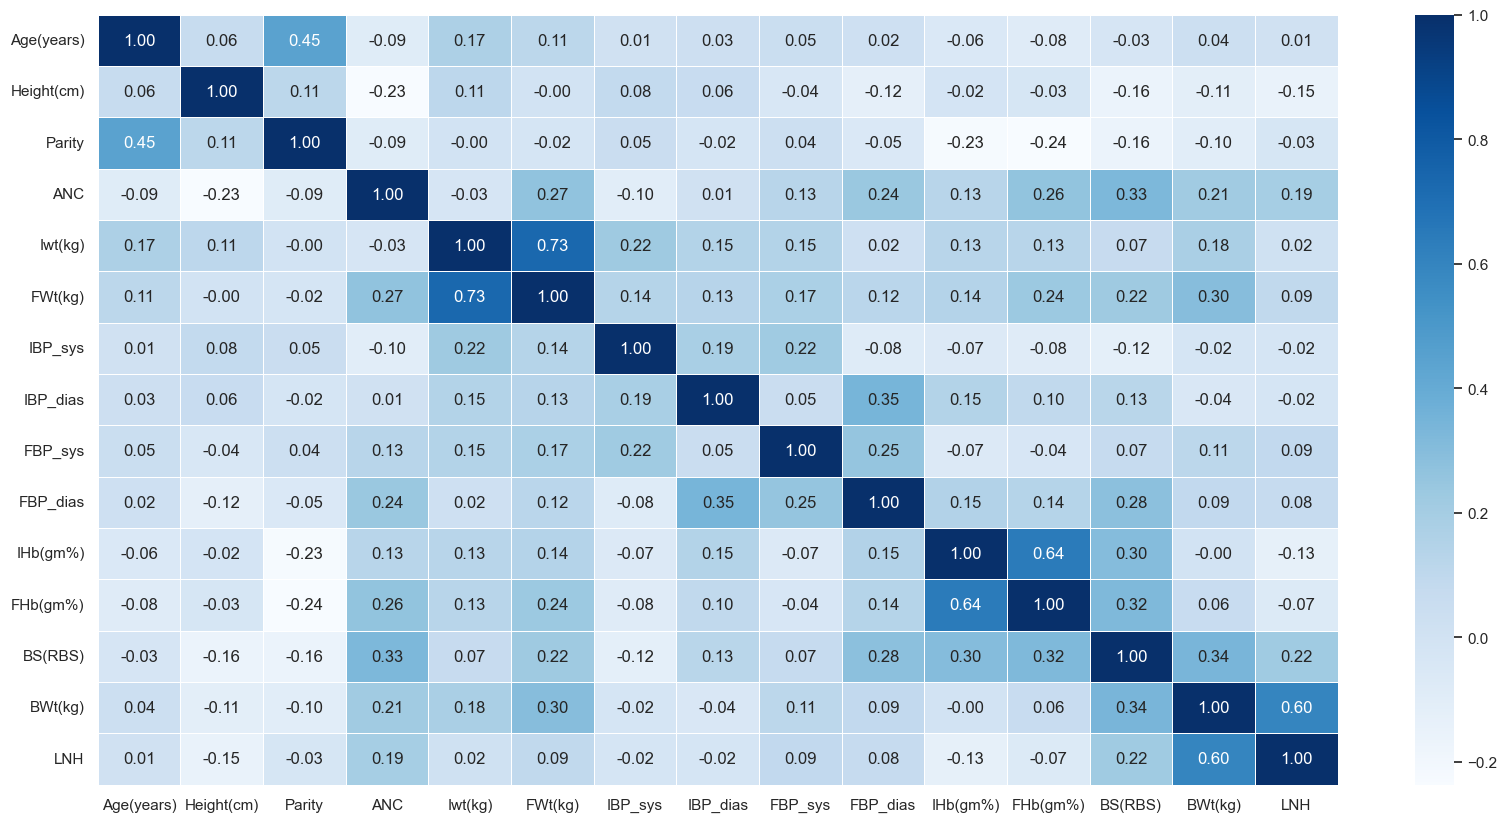

In [150]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap=sns.color_palette("Blues", as_cmap=True), linewidths=.5)
plt.show()

Možemo vidjeti da su početna i završna kilaža u visokoj korelaciji, što je za očekivati.<br>
Zanimljivo je da su početna i završna razina hemoglobina također u visokoj korelaciji. <br>